In [1]:
from gensim.models import Word2Vec

import numpy as np
import pandas as pd

from sklearn.decomposition import PCA

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

## Dane

In [2]:
sentences = []

for i in range(100000):
    start = np.random.randint(0, 20)
    finish = start + np.random.randint(1, 10)
    sentence = [str(x) for x in (range(start, finish))]
    sentences.append(sentence)

## Model Word2Vec

In [3]:
model = Word2Vec(sentences, size=10, window=5, min_count=1)

In [4]:
model.wv['1']

array([ 3.3846986 , -1.5740352 , -1.6432067 ,  1.7534736 ,  1.8406732 ,
       -0.09608737, -0.5263919 ,  0.8283417 ,  3.1437979 , -1.2043415 ],
      dtype=float32)

In [5]:
def plot_heatmap(model):
    plt.figure(figsize=(15,8))
    sns.heatmap(model.wv[model.wv.vocab], linewidths=0.5);

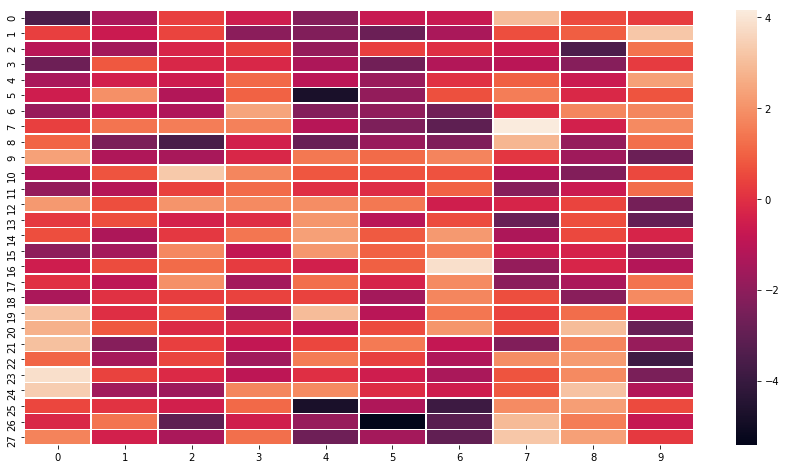

In [6]:
plot_heatmap(model)

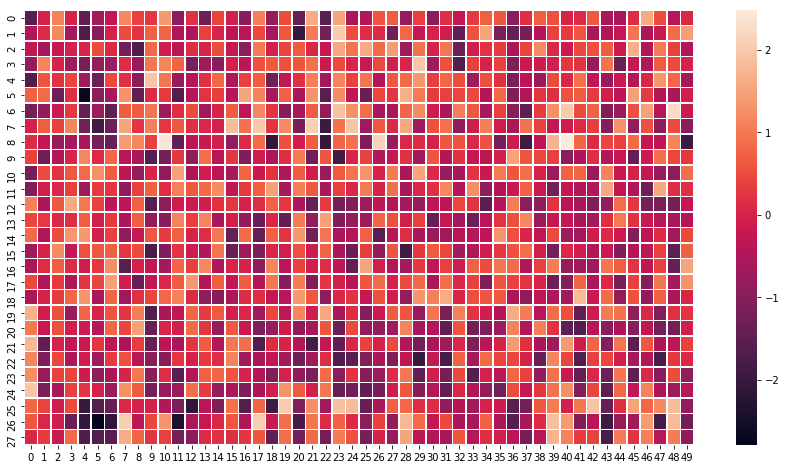

In [7]:
plot_heatmap(Word2Vec(sentences, size=50, window=10))

## PCA

In [8]:
def plot_pca(model):
    X = model.wv[model.wv.vocab]
    pca_model = PCA(n_components=2)
    result = pca_model.fit_transform(X)
    plt.figure(figsize=(10,8))
    plt.scatter(result[:,0], result[:,1]);

    words = list(model.wv.vocab)
    for i, word in enumerate(words):
        plt.annotate(word, xy=(result[i,0], result[i,1]))

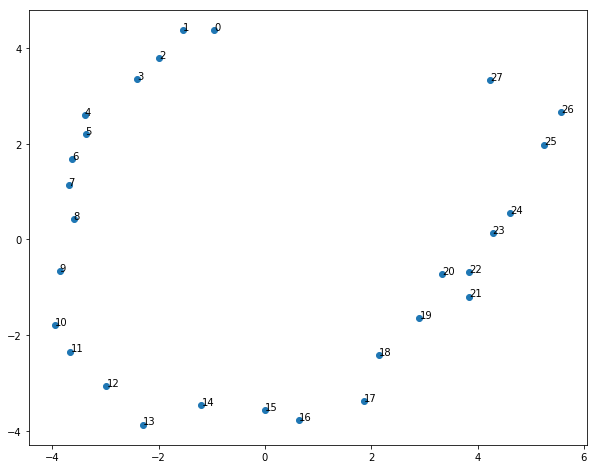

In [9]:
plot_pca(model)

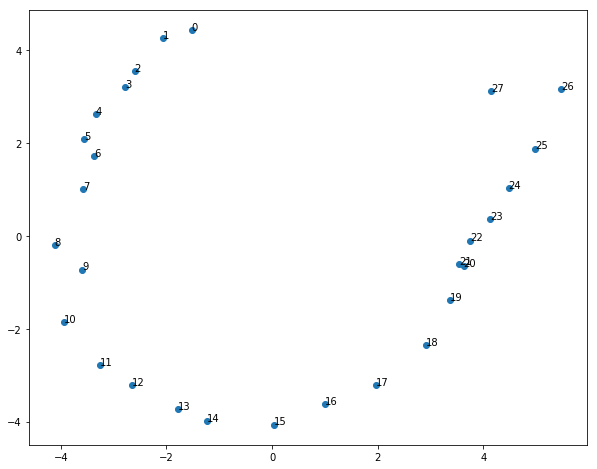

In [10]:
plot_pca(Word2Vec(sentences, size=50, window=10))

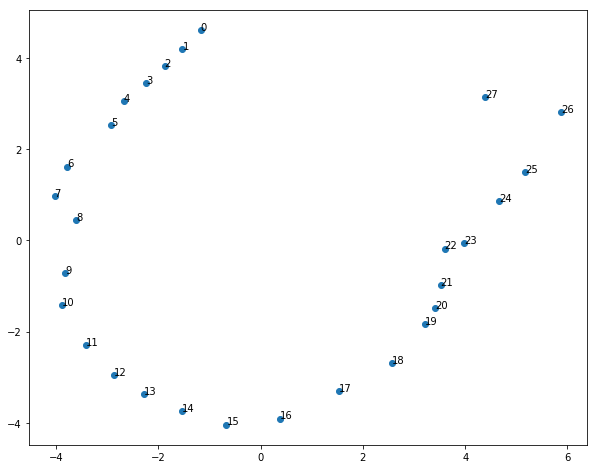

In [11]:
plot_pca(Word2Vec(sentences, size=300, window=5))

## Podobne słowa

In [12]:
model = Word2Vec(sentences, size=300, window=5)

In [13]:
model.wv.most_similar('10', topn=3)

[('7', 0.3508867919445038),
 ('11', 0.3331153988838196),
 ('12', 0.3276935815811157)]

In [14]:
model.wv.most_similar(positive=['10', '8'], negative=['6'], topn=3)

[('12', 0.30900537967681885),
 ('11', 0.30221641063690186),
 ('13', 0.29362133145332336)]